Generates data for boxplots

(from metrics3k_plts2)

In [1]:
import numpy as np
import pandas as pd

# Data

In [2]:
DATA_PATH = "./data/"

In [3]:
raw_fn = "archiveII_220808"
dref = pd.read_csv(DATA_PATH + raw_fn + ".csv", index_col = "id")
# display(dref.head(3))

FileNotFoundError: [Errno 2] No such file or directory: './data/archiveII_220808.csv'

In [ ]:
L_UP_TO = 512
upto = list(dref.loc[dref.len <= L_UP_TO].index)
dref = dref.loc[upto]
# dref.head()

In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [4]:
rnadist = pd.read_hdf(DATA_PATH + "rnadist_f_all.h5")
splits = pd.read_csv(DATA_PATH + "archiveII_hl_splits.csv")
rnadist

id,5s_Acholeplasma-laidlawii-1,5s_Acidovorax-temperans-1,tmRNA_Stre.gord._TRW-29390_1-349,tRNA_tdbR00000055-Schizosaccharomyces_pombe-4896-Glu-3UC,srp_List.mono._U15684,5s_Methanothermobacter-thermautotrophicus-6,srp_Vibr.fisc._CP000020,srp_Baci.thur._D11412,grp1_a.I1.m.M.grisea.B2.ND1,5s_Saprospira-grandis-1,...,RNaseP_M.avium,tRNA_tdbR00000521-Bos_taurus-9913-Ini-CAU,grp1_a.I1.e.P.pachydermus.C1.SSU.943,5s_Pseudomonas-stutzeri-2,16s_T.maritima_domain3,5s_Bacillus-cereus-6,srp_Myco.aviu._AE016958,tmRNA_Heli.pylo._AE001503_1-383,5s_Triticum-aestivum-1,5s_Streptomyces-violaceus-1
id,,,,,,,,,,,,,,,,,,,,,
5s_Acholeplasma-laidlawii-1,0.000000,0.130435,0.805158,0.562500,0.799283,0.265625,0.776786,0.756458,0.782456,0.173554,...,0.763819,0.625000,0.795918,0.150000,0.817734,0.140351,0.696429,0.806789,0.200000,0.216667
5s_Acidovorax-temperans-1,0.130435,0.000000,0.819484,0.591304,0.802867,0.179688,0.747826,0.752768,0.778947,0.132231,...,0.756281,0.652174,0.798469,0.108333,0.815271,0.130435,0.756522,0.814621,0.191667,0.125000
tmRNA_Stre.gord._TRW-29390_1-349,0.805158,0.819484,0.000000,0.785100,1.002865,0.799427,0.762178,0.951289,0.693410,0.802292,...,0.675879,0.805158,0.686224,0.822350,0.701970,0.810888,0.839542,0.234987,0.805158,0.793696
tRNA_tdbR00000055-Schizosaccharomyces_pombe-4896-Glu-3UC,0.562500,0.591304,0.785100,0.000000,0.824373,0.570312,0.720721,0.789668,0.821053,0.578512,...,0.826633,0.253333,0.839286,0.541667,0.825123,0.570175,0.943182,0.804178,0.541667,0.591667
srp_List.mono._U15684,0.799283,0.802867,1.002865,0.824373,0.000000,0.770609,0.616487,0.279570,1.066667,0.759857,...,0.997487,0.799283,0.890306,0.784946,0.967980,0.763441,0.784946,0.981723,0.770609,0.756272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5s_Bacillus-cereus-6,0.140351,0.130435,0.810888,0.570175,0.763441,0.234375,0.798246,0.763838,0.761404,0.157025,...,0.768844,0.596491,0.785714,0.133333,0.788177,0.000000,0.684211,0.822454,0.233333,0.183333
srp_Myco.aviu._AE016958,0.696429,0.756522,0.839542,0.943182,0.784946,0.703125,0.801802,0.800738,0.747368,0.735537,...,0.819095,0.818182,0.785714,0.633333,0.807882,0.684211,0.000000,0.832898,0.716667,0.750000
tmRNA_Heli.pylo._AE001503_1-383,0.806789,0.814621,0.234987,0.804178,0.981723,0.775457,0.783290,0.929504,0.642298,0.798956,...,0.721106,0.812010,0.742347,0.796345,0.731527,0.822454,0.832898,0.000000,0.801567,0.791123


In [5]:

fam=[]
for i in range(len(rnadist.iloc[0])):
    fam.append(rnadist.iloc[i].name.partition('_')[0])

all_fam= dict.fromkeys(fam)
all_fam



{'5s': None,
 'tmRNA': None,
 'tRNA': None,
 'srp': None,
 'grp1': None,
 'RNaseP': None,
 '23s': None,
 '16s': None,
 'telomerase': None,
 'grp2': None}

In [6]:
for current_fam in list(all_fam):
    ids_aux=[]
    for id,fam_name in enumerate(fam):
        # print(f'current_fam = {current_fam} fam_name = {fam_name}')
        if (fam_name == current_fam):
            ids_aux.append(id)
    all_fam[current_fam]=ids_aux

rnadist.iloc[all_fam['5s'],all_fam['5s']]

id,5s_Acholeplasma-laidlawii-1,5s_Acidovorax-temperans-1,5s_Methanothermobacter-thermautotrophicus-6,5s_Saprospira-grandis-1,5s_Paracentrotus-lividus-1,5s_Tremella-mesenterica-1,5s_Coxiella-burnetii-2,5s_Ganoderma-applanatum-1,5s_Beggiatoa-alba-1,5s_Xenopus-borealis-2,...,5s_Pyrococcus-abyssi-1,5s_Ureaplasma-parvum-3,5s_Lentinula-edodes-2,5s_Andrias-japonicus-2,5s_Rhodosporidium-toruloides-1,5s_Pseudonocardia-compacta-1,5s_Pseudomonas-stutzeri-2,5s_Bacillus-cereus-6,5s_Triticum-aestivum-1,5s_Streptomyces-violaceus-1
id,,,,,,,,,,,,,,,,,,,,,
5s_Acholeplasma-laidlawii-1,0.000000,0.130435,0.265625,0.173554,0.216667,0.288136,0.288136,0.203390,0.183333,0.283333,...,0.338983,0.089286,0.233333,0.190083,0.193277,0.166667,0.150000,0.140351,0.200000,0.216667
5s_Acidovorax-temperans-1,0.130435,0.000000,0.179688,0.132231,0.158333,0.245763,0.245763,0.177966,0.091667,0.225000,...,0.279661,0.130435,0.225000,0.132231,0.134454,0.058333,0.108333,0.130435,0.191667,0.125000
5s_Methanothermobacter-thermautotrophicus-6,0.265625,0.179688,0.000000,0.210938,0.171875,0.187500,0.234375,0.171875,0.140625,0.203125,...,0.203125,0.265625,0.203125,0.179688,0.179688,0.171875,0.250000,0.234375,0.140625,0.203125
5s_Saprospira-grandis-1,0.173554,0.132231,0.210938,0.000000,0.239669,0.223140,0.157025,0.206612,0.140496,0.272727,...,0.256198,0.206612,0.239669,0.214876,0.198347,0.123967,0.206612,0.157025,0.256198,0.140496
5s_Paracentrotus-lividus-1,0.216667,0.158333,0.171875,0.239669,0.000000,0.150000,0.333333,0.083333,0.183333,0.066667,...,0.300000,0.233333,0.100000,0.041322,0.091667,0.166667,0.183333,0.166667,0.116667,0.216667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5s_Pseudonocardia-compacta-1,0.166667,0.058333,0.171875,0.123967,0.166667,0.216667,0.266667,0.183333,0.066667,0.233333,...,0.266667,0.166667,0.233333,0.140496,0.108333,0.000000,0.150000,0.133333,0.200000,0.100000
5s_Pseudomonas-stutzeri-2,0.150000,0.108333,0.250000,0.206612,0.183333,0.300000,0.300000,0.200000,0.166667,0.250000,...,0.383333,0.150000,0.233333,0.157025,0.208333,0.150000,0.000000,0.133333,0.250000,0.200000
5s_Bacillus-cereus-6,0.140351,0.130435,0.234375,0.157025,0.166667,0.271186,0.203390,0.169492,0.150000,0.233333,...,0.271186,0.175439,0.150000,0.123967,0.210084,0.133333,0.133333,0.000000,0.233333,0.183333


#5s entre si

In [20]:
s5_dist = np.array(rnadist.iloc[all_fam['5s'],all_fam['5s']])
s5_dist_m = np.triu(s5_dist)
a=np.triu_indices_from(s5_dist)
s5_dist=s5_dist[a]

s5_average = sum(s5_dist)/(len(s5_dist)-len(all_fam['5s']))

tmRNA_dist = np.array(rnadist.iloc[all_fam['tmRNA'],all_fam['tmRNA']])
a=np.triu_indices_from(tmRNA_dist)
tmRNA_dist=tmRNA_dist[a]
tmRNA_average = sum(tmRNA_dist)/(len(tmRNA_dist)-len(all_fam['tmRNA']))

tRNA_dist = np.array(rnadist.iloc[all_fam['tRNA'],all_fam['tRNA']])
a=np.triu_indices_from(tRNA_dist)
tRNA_dist=tRNA_dist[a]
tRNA_average = sum(tRNA_dist)/(len(tRNA_dist)-len(all_fam['tRNA']))

srp_dist = np.array(rnadist.iloc[all_fam['srp'],all_fam['srp']])
a=np.triu_indices_from(srp_dist)
srp_dist=srp_dist[a]
srp_average = sum(srp_dist)/(len(srp_dist)-len(all_fam['srp']))

grp1_dist = np.array(rnadist.iloc[all_fam['grp1'],all_fam['grp1']])
a=np.triu_indices_from(grp1_dist)
grp1_dist=grp1_dist[a]
grp1_average = sum(grp1_dist)/(len(grp1_dist)-len(all_fam['grp1']))

RNaseP_dist = np.array(rnadist.iloc[all_fam['RNaseP'],all_fam['RNaseP']])
a=np.triu_indices_from(RNaseP_dist)
RNaseP_dist=RNaseP_dist[a]
RNaseP_average = sum(RNaseP_dist)/(len(RNaseP_dist)-len(all_fam['RNaseP']))

s23_dist = np.array(rnadist.iloc[all_fam['23s'],all_fam['23s']])
a=np.triu_indices_from(s23_dist)
s23_dist_m = np.triu(s23_dist)
s23_dist=s23_dist[a]
s23_average = sum(s23_dist)/(len(s23_dist)-len(all_fam['23s']))

s16_dist = np.array(rnadist.iloc[all_fam['16s'],all_fam['16s']])
a=np.triu_indices_from(s16_dist)
s16_dist=s16_dist[a]
s16_average = sum(s16_dist)/(len(s16_dist)-len(all_fam['16s']))

telomerase_dist = np.array(rnadist.iloc[all_fam['telomerase'],all_fam['telomerase']])
a=np.triu_indices_from(telomerase_dist)
telomerase_dist=telomerase_dist[a]
telomerase_average = sum(telomerase_dist)/(len(telomerase_dist)-len(all_fam['telomerase']))

grp2_dist = np.array(rnadist.iloc[all_fam['grp2'],all_fam['grp2']])
a=np.triu_indices_from(grp2_dist)
grp2_dist=grp2_dist[a]
grp2_average = sum(grp2_dist)/(len(grp2_dist)-len(all_fam['grp2']))


In [21]:
s23_dist_m = np.where(s23_dist_m==0,np.inf,s23_dist_m)
min_23s = np.min(s23_dist_m,axis=0)[1:]
np.mean(min_23s)

0.1920964798711895

In [29]:
import draw_rna.draw as dr
dr.draw_rna('AAAGGGAAA','...((()))...',color_list='r')

Error occured while drawing RNA 6 5


NameError: name 'sys' is not defined

In [ ]:
s5_dist=s5_dist[a]

s5_average = sum(s5_dist)/(len(s5_dist)-len(all_fam['5s']))

tmRNA_dist = np.array(rnadist.iloc[all_fam['tmRNA'],all_fam['tmRNA']])
a=np.triu_indices_from(tmRNA_dist)
tmRNA_dist=tmRNA_dist[a]
tmRNA_average = sum(tmRNA_dist)/(len(tmRNA_dist)-len(all_fam['tmRNA']))

tRNA_dist = np.array(rnadist.iloc[all_fam['tRNA'],all_fam['tRNA']])
a=np.triu_indices_from(tRNA_dist)
tRNA_dist=tRNA_dist[a]
tRNA_average = sum(tRNA_dist)/(len(tRNA_dist)-len(all_fam['tRNA']))

srp_dist = np.array(rnadist.iloc[all_fam['srp'],all_fam['srp']])
a=np.triu_indices_from(srp_dist)
srp_dist=srp_dist[a]
srp_average = sum(srp_dist)/(len(srp_dist)-len(all_fam['srp']))

grp1_dist = np.array(rnadist.iloc[all_fam['grp1'],all_fam['grp1']])
a=np.triu_indices_from(grp1_dist)
grp1_dist=grp1_dist[a]
grp1_average = sum(grp1_dist)/(len(grp1_dist)-len(all_fam['grp1']))

RNaseP_dist = np.array(rnadist.iloc[all_fam['RNaseP'],all_fam['RNaseP']])
a=np.triu_indices_from(RNaseP_dist)
RNaseP_dist=RNaseP_dist[a]
RNaseP_average = sum(RNaseP_dist)/(len(RNaseP_dist)-len(all_fam['RNaseP']))

s23_dist = np.array(rnadist.iloc[all_fam['23s'],all_fam['23s']])
a=np.triu_indices_from(s23_dist)
s23_dist=s23_dist[a]
s23_average = sum(s23_dist)/(len(s23_dist)-len(all_fam['23s']))

s16_dist = np.array(rnadist.iloc[all_fam['16s'],all_fam['16s']])
a=np.triu_indices_from(s16_dist)
s16_dist=s16_dist[a]
s16_average = sum(s16_dist)/(len(s16_dist)-len(all_fam['16s']))

telomerase_dist = np.array(rnadist.iloc[all_fam['telomerase'],all_fam['telomerase']])
a=np.triu_indices_from(telomerase_dist)
telomerase_dist=telomerase_dist[a]
telomerase_average = sum(telomerase_dist)/(len(telomerase_dist)-len(all_fam['telomerase']))

grp2_dist = np.array(rnadist.iloc[all_fam['grp2'],all_fam['grp2']])
a=np.triu_indices_from(grp2_dist)
grp2_dist=grp2_dist[a]

grp2_average = sum(grp2_dist)/(len(grp2_dist)-len(all_fam['grp2']))


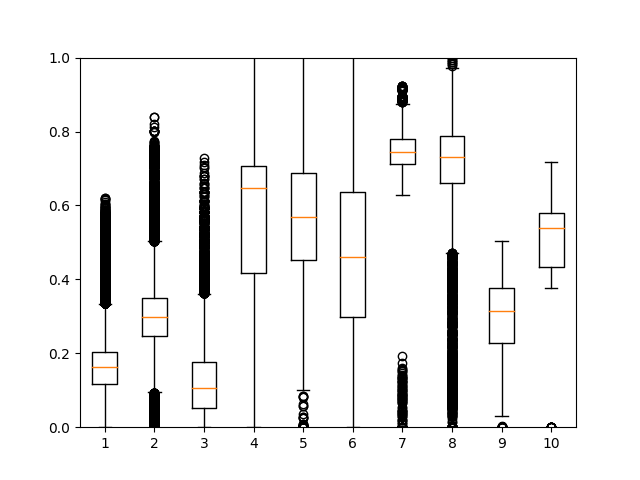

In [13]:
data = [s5_dist,tmRNA_dist,tRNA_dist,srp_dist,grp1_dist,RNaseP_dist,s23_dist,s16_dist,telomerase_dist,grp2_dist]
fig1, ax1 = plt.subplots()
plt.ylim(0,1)
plt.boxplot(data)
plt.show()

<BarContainer object of 10 artists>

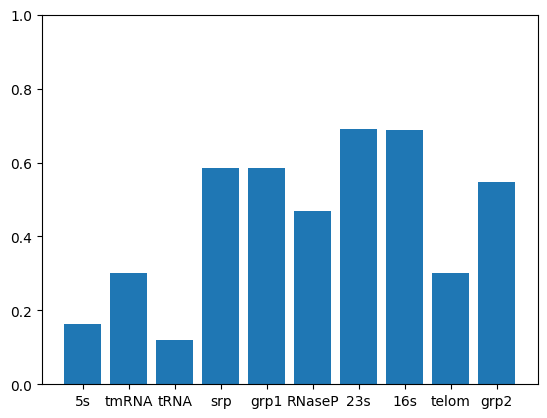

In [9]:
inter_avg=[s5_average,tmRNA_average,tRNA_average,srp_average,grp1_average,RNaseP_average,s23_average,s16_average,telomerase_average,grp2_average]
plt.ylim(0,1)
plt.bar(['5s','tmRNA','tRNA','srp','grp1','RNaseP','23s','16s','telom','grp2'],inter_avg)


In [10]:
names = ['5s','tmRNA','tRNA','srp','grp1','RNaseP','23s','16s','telom','grp2']
names_v_names=[]
for n1 in names:
    for n2 in names:
        name=n1 + '_' + n2
        names_v_names.append(name)

In [11]:
avg=np.zeros([len(list(all_fam)),len(list(all_fam))])
for i,i_name in enumerate(list(all_fam)):
    for j,j_name in enumerate(list(all_fam)):
        diff_M = np.array(rnadist.iloc[all_fam[i_name],all_fam[j_name]])
        a=np.triu_indices_from(diff_M )
        avg[i][j] = (sum(diff_M [a])/len(diff_M [a]))

a=np.triu_indices_from(avg)
# avg = avg[a]

<BarContainer object of 100 artists>

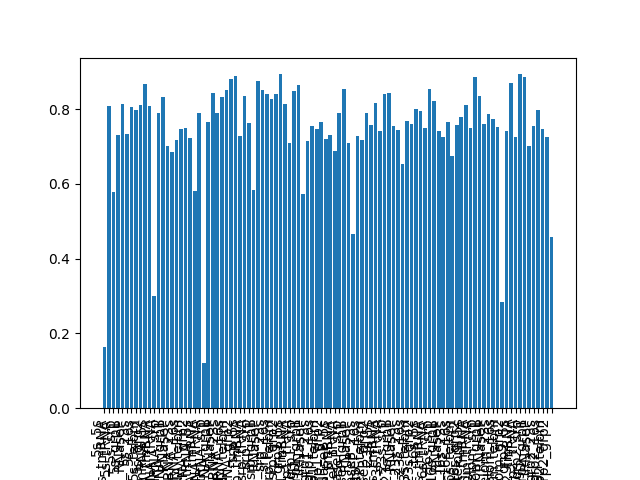

In [12]:
%matplotlib widget
fig, ax = plt.subplots()
plt.setp( ax.xaxis.get_majorticklabels(), rotation=90, ha="right" )
plt.gcf().subplots_adjust(bottom=0.15)
plt.bar(names_v_names,avg.flatten(),align='center')

In [ ]:
rnastr_metrics = pd.read_csv(DATA_PATH + "archiveII_220808_rnastructure_fmetrics_appr.csv", index_col=0)
rnafld_metrics = pd.read_csv(DATA_PATH + "archiveII_220808_rnafold_fmetrics_appr.csv", index_col=0)
ipknot_metrics = pd.read_csv(DATA_PATH + "archiveII_220808_ipknot_fmetrics_appr.csv", index_col=0)
linfld_metrics = pd.read_csv(DATA_PATH + "archiveII_220808_linearfold_fmetrics_appr.csv", index_col=0)
# linefld_metrics

In [ ]:
hlfoldS = ["hl10", "hl25", "hl50", "hl75", "hl90"]
hlfoldS = hlfoldS + ["k0", "k1", "k2", "k3", "k4"]
hlfoldS = hlfoldS + ["16s", "23s", "5s", "grp1", "RNaseP", "srp", "telomerase", "tmRNA", "tRNA"]

dlrna_ms = [] 
for hlfold in hlfoldS:
    hldf = pd.read_csv(DATA_PATH + "dlrna_" + hlfold + ".csv", index_col=0)
    if hlfold[0]=="k":
        hldf["split_type"] = "k-fold"
    elif hlfold[0]=="h":
        hldf["split_type"] = hlfold + "-fold"
    else:
        hldf["split_type"] = "fam-fold"
        
    dlrna_ms.append(hldf)

dlrna_metrics = pd.concat(dlrna_ms) 
dlrna_metrics.rename(columns={"ppv": "p_appr1", "sen": "s_appr1", "f1": "f1_appr1"}, inplace=True)
dlrna_metrics.head()

,p_appr1,s_appr1,f1_appr1,split_type
name,,,,
srp_Sili.spec._CP000377,0.000000,0.000000,0.000000,hl10-fold
srp_Para.bras._CN241137,0.000000,0.000000,0.000000,hl10-fold
srp_Clos.beij._CP000721,0.676056,0.774194,0.721805,hl10-fold
tRNA_tdbR00000052-Aedes_albopictus-7160-Glu-NUC,1.000000,0.950000,0.974359,hl10-fold
srp_Bdel.bact._BX842656,0.000000,0.000000,0.000000,hl10-fold


In [ ]:
hlfoldS1 = ["10", "25", "50", "75", "90"]
hlfoldS2 = ["0", "1", "2", "3", "4"]
hlfoldS3 = ["0", "1", "2", "3", "4", "5", "6", "7", "8"]

mxfold_ms = [] 
for hlfold in hlfoldS1:
    hldf = pd.read_csv(DATA_PATH + "mxfold2/HL-fold/" + "tst_" + hlfold + "_out_fmetrics_appr.csv", index_col=0)
    hldf["split_type"] = "hl" + hlfold + "-fold"
    mxfold_ms.append(hldf)

for hlfold in hlfoldS2:
    hldf = pd.read_csv(DATA_PATH + "mxfold2/k-fold/" + "tst_" + hlfold + "_out_fmetrics_appr.csv", index_col=0)
    hldf["split_type"] = "k-fold"
    mxfold_ms.append(hldf)

for hlfold in hlfoldS3:
    hldf = pd.read_csv(DATA_PATH + "mxfold2/fam-fold/" + "tst_" + hlfold + "_out_fmetrics_appr.csv", index_col=0)
    hldf["split_type"] = "fam-fold"
    mxfold_ms.append(hldf)

mxfold_metrics = pd.concat(mxfold_ms) 
#mxfold_metrics.rename(columns={"ppv": "p_appr1", "sen": "s_appr1", "f1": "f1_appr1"}, inplace=True)
mxfold_metrics.head()

,s,p,f1,s_appr1,p_appr1,f1_appr1,split_type
srp_Coxi.burn._AE016828,0.0,0.0,0.0,0.500000,0.285714,0.363636,hl10-fold
tRNA_tdbR00000052-Aedes_albopictus-7160-Glu-NUC,0.0,0.0,0.0,0.000000,0.000000,0.000000,hl10-fold
srp_Proc.mari._AE017126,0.0,0.0,0.0,0.666667,1.000000,0.800000,hl10-fold
srp_Kine.radi._CP000750,0.0,0.0,0.0,0.625000,0.666667,0.645161,hl10-fold
srp_Phyt.infe._CV911012,0.0,0.0,0.0,0.000000,0.000000,0.000000,hl10-fold


In [ ]:
ufold_hl = pd.read_csv(DATA_PATH + "ufold_hl-ml.csv", index_col=1)
ufold_hl.head()

,Unnamed: 0,p_appr1,s_appr1,f1_appr1,f1_exact,split_type,fold_number
name,,,,,,,
srp_Crit.fasc._AY781797,0,0.000000,0.000000,0.000000,0.000000,hl5-fold,0
tRNA_tdbR00000399-Aedes_albopictus-7160-Ser-GCU,1,0.000000,0.000000,0.428571,0.000000,hl5-fold,0
RNaseP_Onchorhynchus-sp-2,2,0.224719,0.377358,0.329061,0.281690,hl5-fold,0
srp_Hahe.chej._CP000155,3,0.793103,0.920000,0.925926,0.851852,hl5-fold,0
tRNA_tdbR00000205-Loligo_bleekeri-6617-Lys-NUU,4,0.950000,1.000000,0.974359,0.974359,hl5-fold,0


In [ ]:
ufold_fam_k = pd.read_csv(DATA_PATH + "ufold_fam-kfold.csv", index_col=1)
ufold_fam_k.head()

,Unnamed: 0,p_appr1,s_appr1,f1_appr1,f1_exact,split_type,fold_number
name,,,,,,,
5s_Halorubrum-distributum-3,0,0.906250,0.906250,0.906250,0.906250,k-fold,0
tRNA_tdbR00000115-Staphylococcus_epidermidis-1282-Gly-UCC,1,1.000000,1.000000,1.000000,1.000000,k-fold,0
tmRNA_Baci.G._TRW-12333_1-312,2,0.250000,0.368421,0.297872,0.297872,k-fold,0
5s_Thraustochytrium-visurgense-1,3,1.000000,1.000000,1.000000,1.000000,k-fold,0
5s_Saccharothrix-australiensis-1,4,0.942857,0.970588,0.985507,0.956522,k-fold,0


In [ ]:
ufold_metrics = pd.concat([ufold_hl, ufold_fam_k])

In [ ]:
# simulating fam-fold & k-fold 

# hl50 = ufold_metrics.loc[ufold_metrics.split_type=="hl50-fold"]
# hl50 = hl50[["s_appr1", "p_appr1", "f1_appr1"]]

# ffoldm = hl50 - hl50.mean() + 0.44 # from https://doi.org/10.1093/bioinformatics/btac415
# ffoldm = ffoldm.loc[(ffoldm.f1_appr1>=0) & (ffoldm.f1_appr1<=1)] # remove negatives
# ffoldm["split_type"] = "fam-fold"

# kfoldm = hl50 - hl50.mean() + 0.88 # from LeaB
# kfoldm = kfoldm.loc[(kfoldm.f1_appr1>=0) & (kfoldm.f1_appr1<=1)] # remove negatives
# kfoldm["split_type"] = "k-fold"

# ufold_metrics = pd.concat([ufold_metrics, ffoldm, kfoldm])

In [11]:
rnastr_metrics["method"] = "RNAstructure"
rnafld_metrics["method"] = "RNAfold"
dlrna_metrics["method"] = "dl-rna" 
ipknot_metrics["method"] = "ipknot" 
linfld_metrics["method"] = "Linear-fold" 
ufold_metrics["method"] = "UFold" 
mxfold_metrics["method"] = "mxfold2" 

all_metrics = pd.concat([rnastr_metrics, rnafld_metrics, dlrna_metrics, ipknot_metrics, linfld_metrics, ufold_metrics, mxfold_metrics])
all_metrics = all_metrics[["method", "split_type", "f1_appr1"]]
all_metrics.head()

NameError: name 'rnastr_metrics' is not defined

In [9]:
aiisplits1 = pd.read_csv(DATA_PATH + "archiveII_splits.csv")
aiisplits2 = pd.read_csv(DATA_PATH + "archiveII_hl_splits.csv")
aiisplits = pd.concat([aiisplits1,aiisplits2])
aiisplits.head()

,split_type,fold_name,fold_number,partition,id
0,k-fold,0,0,train,tmRNA_Stre.gord._TRW-29390_1-349
1,k-fold,0,0,train,tRNA_tdbR00000055-Schizosaccharomyces_pombe-48...
2,k-fold,0,0,train,srp_List.mono._U15684
3,k-fold,0,0,train,srp_Vibr.fisc._CP000020
4,k-fold,0,0,train,srp_Baci.thur._D11412


In [10]:
#methodS = ["RNAfold", "RNAstructure", "dl-rna", "ipknot", "Linear-fold"]
methodS = ["RNAstructure", "ipknot", "Linear-fold", "dl-rna", "UFold", "mxfold2"]
stypeS = ["k-fold", "fam-fold", "hl10-fold", "hl25-fold", "hl50-fold", "hl75-fold", "hl90-fold"]
fold_numbersS = [[0,1,2,3,4],[0,1,2,3,4,5,6,7,8], [0], [0], [0], [0], [0]]
#stypeS = ["fam-fold", "k-fold", "hl25-fold", "hl50-fold", "hl75-fold"]
#fold_numbersS = [[0,1,2,3,4,5,6,7,8], [0,1,2,3,4], [0], [0], [0]]


dataplt = pd.DataFrame(columns = ["method", "split-type", "F1"])
sim_means = {}
    
for stype, fold_numbers in zip(stypeS,fold_numbersS):
    sim_stype = []
    
    for fn in fold_numbers:
        train  = list(aiisplits.loc[(aiisplits.split_type==stype) & (aiisplits.fold_number==fn) & (aiisplits.partition=="train")].id)
        train  = train + list(aiisplits.loc[(aiisplits.split_type==stype) & (aiisplits.fold_number==fn) & (aiisplits.partition=="valid")].id)
        test  = list(aiisplits.loc[(aiisplits.split_type==stype) & (aiisplits.fold_number==fn) & (aiisplits.partition=="test")].id)

        sim_stype.append(1-rnadist.loc[test][train].min().mean())

        for meth in methodS:
            f1s = list(all_metrics.loc[(all_metrics.index.isin(test)) & 
                                       (all_metrics.method==meth) & 
                                       ((all_metrics.split_type==stype) | (all_metrics.split_type.isnull()))].f1_appr1)
            tmpdf = pd.DataFrame({"method": [meth]*len(f1s), "split-type": [stype]*len(f1s), "F1": f1s})
            dataplt = pd.concat([dataplt, tmpdf])

    sim_means[stype] = np.mean(sim_stype)
        

simplt = pd.DataFrame.from_dict(sim_means, orient="index") #columns = ["split-type", "sim"])
simplt.reset_index(inplace=True)
simplt = simplt.rename(columns = {"index":"split-type", 0:"sim"})

display(dataplt.head())
display(simplt.head())

NameError: name 'all_metrics' is not defined

In [5]:
dataplt.to_csv(DATA_PATH + "archiveII_all_F1_appr.csv")
simplt.to_csv(DATA_PATH + "archiveII_all_similarities.csv")

NameError: name 'dataplt' is not defined